In [1]:
try:
    from google.colab import files
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:    
    !pip install wandb
    !pip install kaggle
    !pip install -q  --no-deps tensorflow-addons~=0.6

In [2]:
if IN_COLAB:
    !git clone https://github.com/JoaoMarcosCSilva/Adversarial-Mixup-Resynthesis.git

In [3]:
if IN_COLAB:
    %tensorflow_version 2.x
    %cd Adversarial-Mixup-Resynthesis 

%load_ext autoreload
%autoreload 2
import tensorflow as tf
import wandb
import matplotlib.pyplot as plt
import numpy as np
from lib import data, model, losses, ae_gan, baseline, visualize, acai
from tensorflow import keras

In [4]:
if IN_COLAB:
    !wandb login #9b9824d4cef0c25bf0df0c1c1dec479661637265

In [5]:
# Upload kaggle.json
if IN_COLAB:
    from google.colab import files
    files.upload()
    data.download_data('kaggle.json')

In [6]:
x_train, x_test = data.load_data()

In [7]:
if IN_COLAB:
    !git pull

In [8]:
Type = 'BASELINE'

Model_Layers = 3
Model_Hidden_Size = 40
Model_Starting_Channels = 64
Model_LR = 0.001

Discriminator_Layers = 6
Discriminator_Starting_Channels = 32
Discriminator_LR = 0.001

Train_Discriminator_Every = 1

Lambda = 0.5
Gamma = 0.2
Batch_Size = 32

Epochs = 20

Spectral_Norm = False
Instance_Norm = False

In [9]:
Encoder, Decoder, Model = model.get_Model(Model_Layers, Model_Hidden_Size, Model_Starting_Channels, Instance_Norm)
Disc = model.get_Discriminator(Discriminator_Layers, Discriminator_Starting_Channels, Spectral_Norm) 
if Type.lower() == 'baseline':
  Autoencoder = baseline.Autoencoder(Encoder, Decoder, Disc, keras.optimizers.Adam(Model_LR),
    keras.optimizers.Adam(Discriminator_LR))
elif Type.lower() == 'ae-gan':
  Autoencoder = ae_gan.Autoencoder(Encoder, Decoder, Disc, Lambda, keras.optimizers.Adam(Model_LR),
    keras.optimizers.Adam(Discriminator_LR))
elif Type.lower() == 'acai':
  Autoencoder = acai.Autoencoder(Encoder, Decoder, Disc, Lambda, Gamma, keras.optimizers.Adam(Model_LR),
    keras.optimizers.Adam(Discriminator_LR))
x_data = data.get_tf_data(x_train, batch_size = Batch_Size)

In [13]:
Autoencoder.train(10, x_data)

Epoch: 1
137/137 [==============================] - 71s 517ms/step - Autoencoder Reconstruction Loss: 0.0117 - Autoencoder Mean Gradient: 9.2773e-06
Epoch: 2
137/137 [==============================] - 63s 461ms/step - Autoencoder Reconstruction Loss: 0.0085 - Autoencoder Mean Gradient: 5.3035e-06
Epoch: 3
137/137 [==============================] - 66s 482ms/step - Autoencoder Reconstruction Loss: 0.0069 - Autoencoder Mean Gradient: 3.4509e-06
Epoch: 4
 22/137 [===>..........................] - ETA: 58s - Autoencoder Reconstruction Loss: 0.0068 - Autoencoder Mean Gradient: 5.6711e-06

KeyboardInterrupt: 

In [13]:
for e in range(20):
    Autoencoder.train(1, x_data, log_wandb = False, plot_data = x_test, disc_steps = 1, ae_steps = 1)
    visualize.get_output_image(Autoencoder, 1, 10, x_test, interpolate_images = False)

Epoch: 1
Tensor("Shape_3:0", shape=(2,), dtype=int32) Tensor("Shape_4:0", shape=(2,), dtype=int32)
Tensor("Shape_3:0", shape=(2,), dtype=int32) Tensor("Shape_4:0", shape=(2,), dtype=int32)
21/68 [========>.....................] - ETA: 2:02 - Autoencoder Loss: 0.1343 - Autoencoder Reconstruction Loss: 0.0773 - Discriminator Loss: 0.1750

In [ ]:
Autoencoder.evaluate(x_data)

In [ ]:
run = wandb.init(project = 'pokemon-interpolator', config = {
  'Model_Layers' : Model_Layers,
  'Model_Hidden_Size':Model_Hidden_Size,
  'Model_Starting_Channels':Model_Starting_Channels,
  'Model_LR':Model_LR,
  
  'Type': Type,

  'Discriminator_Layers':Discriminator_Layers,
  'Discriminator_Starting_Channels':Discriminator_Starting_Channels,
  'Discriminator_LR':Discriminator_LR,
  'Train_Discriminator_Every':Train_Discriminator_Every,

  'Epochs':Epochs,
  'Batch_Size':Batch_Size,
  'Lambda':Lambda,

  ''
})

In [0]:
seed = np.random.randint(0,1000)
visualize.get_output_image(Autoencoder, 1, 10, x_test, seed = seed, interpolate_images = False)
visualize.get_output_image(Autoencoder, 1, 10, x_test, seed = seed, interpolate_images = True)

C:\Users\joaom\.conda\envs\tensorflow\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


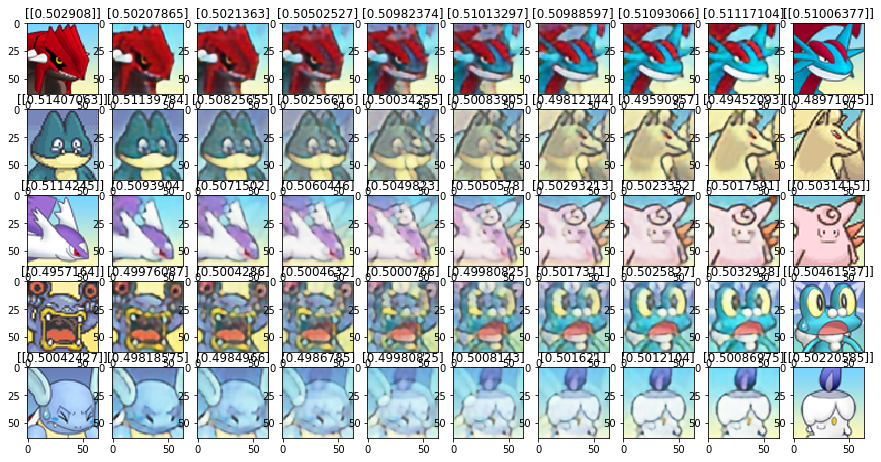

In [15]:
visualize.get_output_image(Autoencoder,5,10,x_train, seed = 1)